In [1]:
import numpy as np
import math
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import scipy.stats as ss
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
sw = set(stopwords.words())
ps = PorterStemmer()

In [3]:
with open ('IR_1.txt',encoding="utf8") as fin:
  data = re.sub('[^a-zA-Z-]',' ',fin.read())
  tokens = word_tokenize(data.lower())
# corpus = tokens
corpus = [ps.stem(token) for token in tokens]

In [4]:
original = str(corpus).replace("\'","").replace(" ","").split(",")          
distinct = set(original)
distinct.difference_update(sw)
distinct = [word for word in distinct if word.isalnum()]

In [5]:
counts = [(w, original.count(w)) for w in distinct]
words_l = [w for (w, c) in counts]
counts_l = [c for (w, c) in counts]
count_rank = ss.rankdata([c for (w, c) in counts])
counts_ranked = list(zip(words_l, counts_l, list(count_rank)))

In [6]:
counts_sorted = sorted(counts_ranked,key=lambda elem : elem[2])
counts_sorted

[('gloom', 1, 638.5),
 ('inspector', 1, 638.5),
 ('recomm', 1, 638.5),
 ('manufactori', 1, 638.5),
 ('retreat', 1, 638.5),
 ('bob', 1, 638.5),
 ('uproar', 1, 638.5),
 ('judgment', 1, 638.5),
 ('everyday', 1, 638.5),
 ('filthi', 1, 638.5),
 ('muscl', 1, 638.5),
 ('dryli', 1, 638.5),
 ('tobacco', 1, 638.5),
 ('depress', 1, 638.5),
 ('record', 1, 638.5),
 ('food', 1, 638.5),
 ('elabor', 1, 638.5),
 ('overlook', 1, 638.5),
 ('grit', 1, 638.5),
 ('utterli', 1, 638.5),
 ('silhouett', 1, 638.5),
 ('shepherd', 1, 638.5),
 ('lust', 1, 638.5),
 ('fresh', 1, 638.5),
 ('novemb', 1, 638.5),
 ('allus', 1, 638.5),
 ('corrobor', 1, 638.5),
 ('bequest', 1, 638.5),
 ('secreci', 1, 638.5),
 ('footpath', 1, 638.5),
 ('fourteenth', 1, 638.5),
 ('scale', 1, 638.5),
 ('hungrili', 1, 638.5),
 ('wax', 1, 638.5),
 ('clump', 1, 638.5),
 ('wallenstein', 1, 638.5),
 ('measur', 1, 638.5),
 ('ventur', 1, 638.5),
 ('institut', 1, 638.5),
 ('worthless', 1, 638.5),
 ('iodoform', 1, 638.5),
 ('customari', 1, 638.5),
 ('

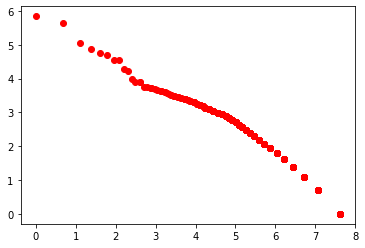

In [7]:
L = len(counts_sorted)
plt.plot([math.log(L-r+1) for (w, c, r) in counts_sorted], [math.log(c) for (w, c, r) in counts_sorted], 'ro')

In [8]:
x = [math.log(L-r+1) for (w, c, r) in counts_sorted]
y = [math.log(c) for (w,c,r) in counts_sorted]
X = np.array(x)
Y = np.array(y)
A = np.vstack([X, np.ones(len(X))]).T
Y_ = Y[:, np.newaxis]
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y_)
print(alpha)

[[-0.95657307]
 [ 7.38088839]]


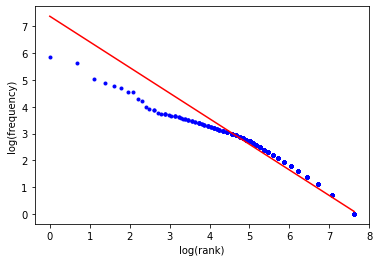

In [9]:
plt.plot(X, Y, 'b.')
plt.plot(X, alpha[0]*X + alpha[1], 'r')
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

In Above Graph We can see that Frequency of word is inversely proportional to Rank 

Ziphs law is Validated

In [10]:
counts_sorted = sorted(counts_ranked,key=lambda elem : elem[1],reverse=True)
req_collection = counts_sorted[:50]
req_collection

[('wa', 345, 2677.0),
 ('hi', 279, 2676.0),
 ('holm', 155, 2675.0),
 ('said', 131, 2674.0),
 ('mr', 117, 2673.0),
 ('upon', 110, 2672.0),
 ('would', 96, 2671.0),
 ('veri', 94, 2670.0),
 ('could', 72, 2669.0),
 ('littl', 68, 2668.0),
 ('see', 54, 2667.0),
 ('know', 50, 2666.0),
 ('look', 49, 2664.5),
 ('well', 49, 2664.5),
 ('us', 43, 2663.0),
 ('may', 42, 2662.0),
 ('hand', 41, 2660.0),
 ('street', 41, 2660.0),
 ('must', 41, 2660.0),
 ('remark', 40, 2658.0),
 ('never', 39, 2657.0),
 ('two', 38, 2655.0),
 ('time', 38, 2655.0),
 ('matter', 38, 2655.0),
 ('onli', 37, 2652.5),
 ('ask', 37, 2652.5),
 ('busi', 36, 2651.0),
 ('sherlock', 35, 2650.0),
 ('case', 34, 2648.5),
 ('say', 34, 2648.5),
 ('quit', 33, 2646.0),
 ('think', 33, 2646.0),
 ('good', 33, 2646.0),
 ('much', 32, 2643.0),
 ('right', 32, 2643.0),
 ('noth', 32, 2643.0),
 ('go', 31, 2640.5),
 ('befor', 31, 2640.5),
 ('might', 30, 2636.5),
 ('came', 30, 2636.5),
 ('interest', 30, 2636.5),
 ('made', 30, 2636.5),
 ('eye', 30, 2636.5),

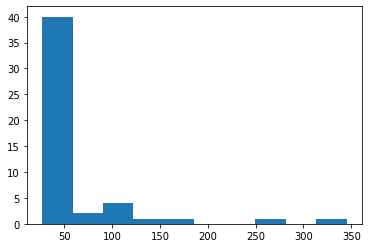

In [11]:
a = np.array([val[1] for val in req_collection])
plt.hist(a,bins=10)
plt.show()